In [1]:
import pandas as pd
import numpy as np
from array import array
import datetime as dt

from itertools import chain


from support import *
from features.feature_ts import genX
from experiment.algorithms.cluster_prep import *

C:\Users\Jason\AppData\Local\Programs\Python\Python39\lib\os.py
c:\Users\Jason\thesis_project


In [2]:
X = genX([1994,2014], drop_0 = True) # Load dataframe

dropping all zero rows


In [3]:
# data = pd.read_pickle('sorted_households.pkl') # Read pickle file
X.reset_index(inplace = True)
# # Extract household IDs
# household_ids = list(data.values())
# householdIDs =  [l.tolist() for l in household_ids]
# householdIDs = list(map(int, chain.from_iterable(householdIDs)))

# Select rows based on condition 
# df = X[X['ProfileID'].isin(householdIDs)] 
df = X.copy()

df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_winter = df[df['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']

# extract weekdays
df_winter['day_names'] = df_winter.date.dt.day_name()
df_winter['daytype'] = df_winter.day_names.where(~df_winter.day_names.isin(weekdays), 'weekday')

df_winter.drop(['day_names'], axis = 1, inplace = True)

df_winter_weekdays  = df_winter[df_winter['daytype'] == 'weekday'] # Create dataframe with only weekdays

df_winter_weekdays.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_winter_weekdays.set_index(['ProfileID','date'], inplace=True)

# df_winter_weekdays.to_csv("Winter_Weekdays_Dataframe.csv")


<ipython-input-3-8aafd821d395>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-3-8aafd821d395>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jason\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
df_winter

,ProfileID,date,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,month,season,daytype
0,1,1994-06-18,3.691667,0.800000,0.508333,2.183333,0.741667,0.658333,1.991667,0.700000,...,3.916667,9.241667,3.275000,6.325000,2.816667,0.925000,2.025000,6,winter,Saturday
1,1,1994-06-19,0.808333,0.500000,2.075000,0.691667,0.325000,2.075000,0.691667,0.316667,...,1.141667,7.283333,5.391667,6.441667,9.716667,7.500000,0.841667,6,winter,Sunday
2,1,1994-06-20,1.058333,1.625000,0.341667,2.100000,1.225000,1.058333,4.808333,4.091667,...,5.541667,5.275000,6.533333,4.708333,10.433333,9.508333,4.408333,6,winter,weekday
3,1,1994-06-21,0.425000,2.350000,0.550000,0.291667,2.100000,0.591667,4.066667,2.791667,...,1.833333,3.466667,8.875000,10.850000,12.908333,9.241667,2.625000,6,winter,weekday
4,1,1994-06-22,0.741667,2.325000,0.583333,1.191667,1.225000,0.575000,4.066667,3.350000,...,6.291667,6.491667,4.458333,13.125000,10.750000,6.200000,1.350000,6,winter,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252795,12029071,2014-08-27,0.320000,0.286667,0.260000,0.240000,0.220000,1.233333,3.346667,0.240000,...,0.720000,2.006667,1.000000,3.580000,1.466667,0.280000,0.400000,8,winter,weekday
3252796,12029071,2014-08-28,0.266667,0.266667,0.366667,0.286667,0.240000,1.053333,3.920000,1.273333,...,0.246667,1.606667,1.333333,3.860000,1.586667,0.293333,0.273333,8,winter,weekday
3252797,12029071,2014-08-29,0.273333,0.273333,0.346667,0.300000,0.273333,1.173333,3.093333,0.813333,...,0.400000,2.200000,1.513333,3.893333,1.453333,0.373333,0.206667,8,winter,weekday
3252798,12029071,2014-08-30,0.300000,0.313333,0.200000,0.246667,0.353333,0.193333,0.160000,3.140000,...,1.046667,2.853333,1.686667,1.313333,2.100000,0.560000,0.240000,8,winter,Saturday


In [5]:

# Remove all households with less than three winter months
winter_months_ids = []

for i in df_winter['ProfileID'].unique():
    if len(df_winter[df_winter['ProfileID'] == i]['month'].unique()) == 3:

        winter_months_ids.append(i)

import pickle

# # save list of houeholds with complete winter months
# with open("winter_months_ids", "wb") as fp:   #Pickling
#    pickle.dump(winter_months_ids, fp)



# Remove all weekends and winter months

In [67]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']

# extract weekdays
df['day_names'] = df.date.dt.day_name()
df['daytype'] = df.day_names.where(~df.day_names.isin(weekdays), 'weekday')

df.drop(['day_names'], axis = 1, inplace = True)

df2 = df[df['daytype'] == 'weekday'] # Create dataframe with only weekdays

# df2['month'] = df2.date.dt.month
df2['season'] = df2['month'].apply(lambda x: 'winter' if x in [6, 7, 8, 9] else 'summer') 
df3 = df2[df2['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends


<ipython-input-67-1bfdb0562e77>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-1bfdb0562e77>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Calculate average monthly consumption for entire year

In [4]:
# X.set_index(['ProfileID', 'date'], inplace = True)
Xdd_A = X.sum(axis=1)
Xdd = Xdd_A*230/1000
Xyearly = resampleProfiles(Xdd, interval='A', aggfunc='sum')
XmonthlyPower = resampleProfiles(Xdd, interval='M', aggfunc='sum')
Xamd = resampleProfiles(XmonthlyPower, interval='A', aggfunc='mean').reset_index().groupby('ProfileID').mean()
Xamd.columns=['AMC_yearly']

In [120]:
Xyearly # Total yearly consumption

0
ProfileID date                    
1         1994-12-31   1900.723862
          1995-12-31   1932.008074
2         1996-12-31     42.477603
3         1997-12-31    328.283568
          1998-12-31   8907.553704
...                            ...
12029049  2014-12-31    275.032428
12029058  2014-12-31  10163.465261
12029062  2014-12-31   4726.686040
12029066  2014-12-31  14984.583685
12029071  2014-12-31    213.850939

[22147 rows x 1 columns]

In [5]:
Xamd # Average monthly consumption 

,AMC_yearly
ProfileID,
1,296.766663
2,10.619401
3,569.030589
4,404.916203
5,510.245011
...,...
12029049,68.758107
12029058,2540.866315
12029062,1181.671510


## Calculate average monthly consumption for winter

In [9]:
df_winter.drop(['month','season','daytype'],axis = 1, inplace = True)

C:\Users\Jason\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Create new dataframe


In [153]:
df_amd = pd.merge(Xamd_winter,Xamd,right_index = True, left_index = True)

In [155]:
# Store AMC values to csv
new_df.to_csv('AMC__yearly_dataframe.csv')
df_amd.to_csv('AMC_dataframe.csv')

# Read AMC values from csv
df_tempo = pd.read_csv('AMC_dataframe.csv')

## Check where the data missing values are coming from


In [21]:
df_50_150 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_50_150.csv',  header=[0, 1], index_col = 0)
df_150_400 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_150_400.csv',  header=[0, 1], index_col = 0)
df_400_600 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_400_600.csv',  header=[0, 1], index_col = 0)
df_600_1200 = pd.read_csv('data/features/FitFeatures/FitFeatures_600_1200.csv',  header=[0, 1], index_col = 0)
df_1200_2500 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_1200_2500.csv',  header=[0, 1], index_col = 0)
df_2500_4000 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_2500_4000.csv',  header=[0, 1], index_col = 0)

# Combine all the data
frame = [df_150_400,df_400_600,df_600_1200,df_1200_2500,df_2500_4000]

df = pd.DataFrame()
df = df_50_150.append(frame)
df.columns = df.columns.droplevel(0)

In [20]:
len(df_600_1200)

1464

In [22]:
# Merge the AMC dataframe and fit features dataframe
new_df = pd.merge(df,Xamd,left_index = True,right_index=True)

In [16]:
new_df['A1_kWh'] = new_df['A1']*230/1000
new_df['A2_kWh'] = new_df['A2']*230/1000

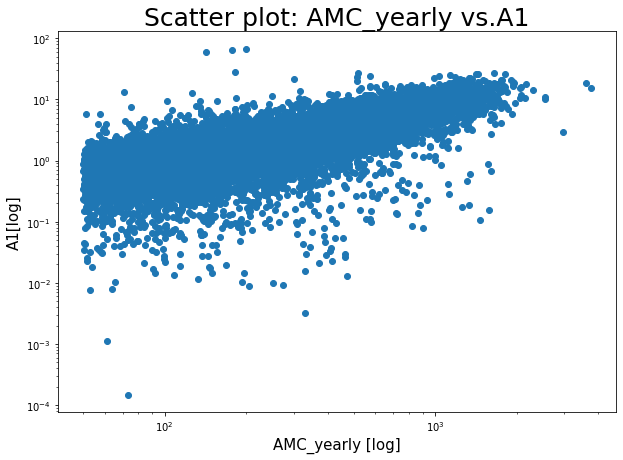

In [23]:
import matplotlib.pyplot as plt

scale = 'log'

feature1 = 'AMC_yearly'
feature2 = 'A1'

x = new_df[feature1]
y = new_df[feature2]

x_label = feature1
y_label = feature2

fig, ax = plt.subplots(figsize =(10, 7))

plt.scatter(x, y)
plt.rc('axes', titlesize=25) 
plt.rc('axes', labelsize=15)
plt.title("Scatter plot: " + x_label + ' vs.' + y_label)
ax.set_ylabel(y_label + "[" + scale + "]")
ax.set_xlabel(x_label + " [" + scale +"]")
ax.set_yscale(scale)
ax.set_xscale(scale)
plt.show()
